In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix

In [17]:
df=pd.read_csv('D:\\AI_DataScience\\Data\\youtube_shorts_performance_dataset.csv')

In [18]:
df.head()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        300 non-null    object
 1   title           300 non-null    object
 2   duration_sec    300 non-null    int64 
 3   hashtags_count  300 non-null    int64 
 4   views           300 non-null    int64 
 5   likes           300 non-null    int64 
 6   comments        300 non-null    int64 
 7   shares          300 non-null    int64 
 8   upload_hour     300 non-null    int64 
 9   category        300 non-null    object
dtypes: int64(7), object(3)
memory usage: 23.6+ KB


In [20]:
df['category']=df['category'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   video_id        300 non-null    object  
 1   title           300 non-null    object  
 2   duration_sec    300 non-null    int64   
 3   hashtags_count  300 non-null    int64   
 4   views           300 non-null    int64   
 5   likes           300 non-null    int64   
 6   comments        300 non-null    int64   
 7   shares          300 non-null    int64   
 8   upload_hour     300 non-null    int64   
 9   category        300 non-null    category
dtypes: category(1), int64(7), object(2)
memory usage: 21.7+ KB


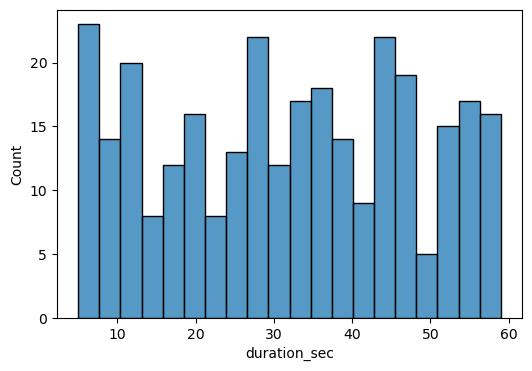

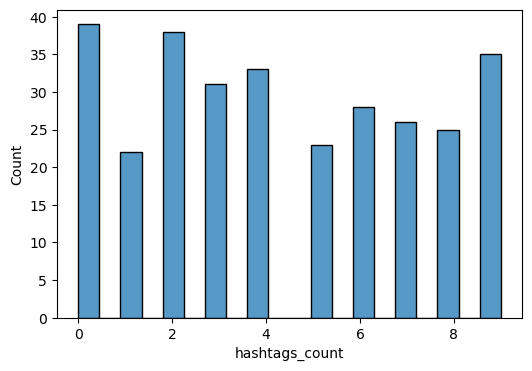

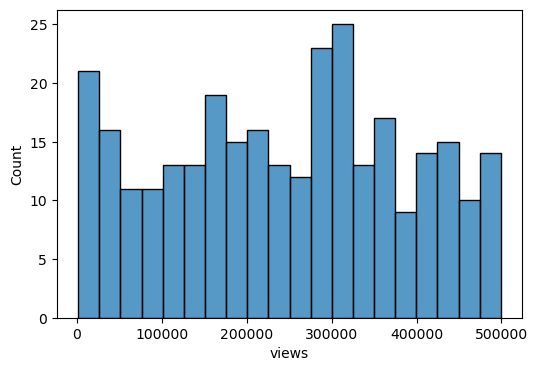

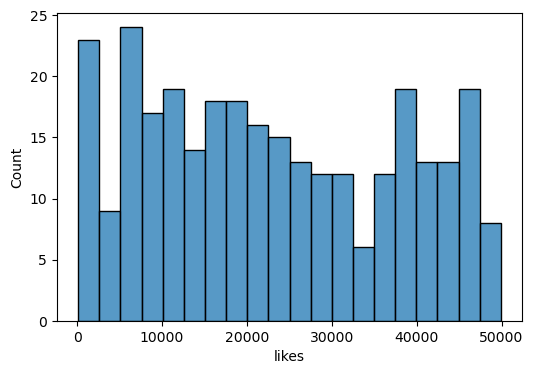

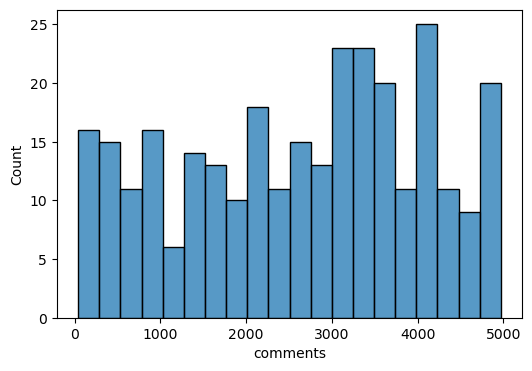

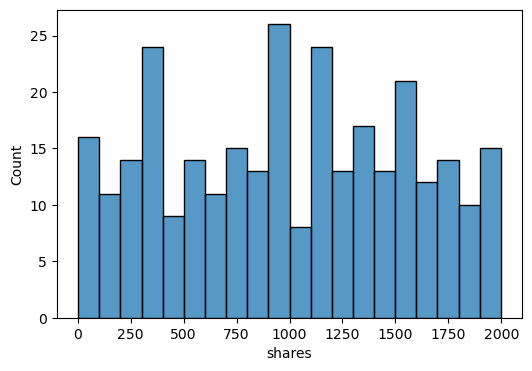

In [26]:
col_num=['duration_sec','hashtags_count','views','likes','comments','shares']
for col in col_num:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],bins=20)
    plt.show()


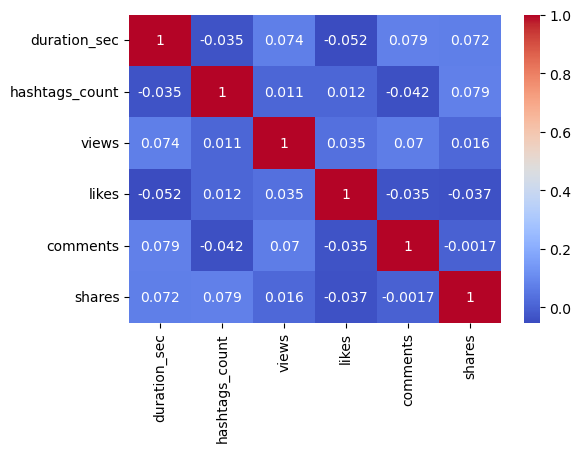

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(df[col_num].corr(),annot=True,cmap='coolwarm')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   video_id        300 non-null    object  
 1   title           300 non-null    object  
 2   duration_sec    300 non-null    int64   
 3   hashtags_count  300 non-null    int64   
 4   views           300 non-null    int64   
 5   likes           300 non-null    int64   
 6   comments        300 non-null    int64   
 7   shares          300 non-null    int64   
 8   upload_hour     300 non-null    int64   
 9   category        300 non-null    category
dtypes: category(1), int64(7), object(2)
memory usage: 21.7+ KB


In [31]:
df['category']=df['category'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        300 non-null    object
 1   title           300 non-null    object
 2   duration_sec    300 non-null    int64 
 3   hashtags_count  300 non-null    int64 
 4   views           300 non-null    int64 
 5   likes           300 non-null    int64 
 6   comments        300 non-null    int64 
 7   shares          300 non-null    int64 
 8   upload_hour     300 non-null    int64 
 9   category        300 non-null    int8  
dtypes: int64(7), int8(1), object(2)
memory usage: 21.5+ KB


In [32]:
df.tail()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
295,vid_1295,Short Video #295,15,3,248940,23810,488,1247,12,4
296,vid_1296,Short Video #296,32,4,366340,29586,46,1548,8,5
297,vid_1297,Short Video #297,29,3,434027,6471,3359,1069,21,0
298,vid_1298,Short Video #298,54,4,318623,6459,4873,1690,14,2
299,vid_1299,Short Video #299,27,6,217464,40731,4806,1136,13,4


In [34]:
X=df.drop(['video_id','title','views'],axis=1)
y=df['views']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model=XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.05,n_jobs=-1,random_state=42)
model.fit(X_train,y_train,
          eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:143686.66106
[1]	validation_0-rmse:143682.88503
[2]	validation_0-rmse:143796.71007
[3]	validation_0-rmse:143785.49341
[4]	validation_0-rmse:143898.55003
[5]	validation_0-rmse:143738.94095
[6]	validation_0-rmse:144014.73026
[7]	validation_0-rmse:144319.23076
[8]	validation_0-rmse:144651.86267
[9]	validation_0-rmse:144962.17904
[10]	validation_0-rmse:145009.39428
[11]	validation_0-rmse:145282.54207
[12]	validation_0-rmse:145502.68709
[13]	validation_0-rmse:145290.27994
[14]	validation_0-rmse:145592.44837
[15]	validation_0-rmse:145895.36898
[16]	validation_0-rmse:145698.26854
[17]	validation_0-rmse:146016.92028
[18]	validation_0-rmse:146335.78311
[19]	validation_0-rmse:146667.89105
[20]	validation_0-rmse:146736.48452
[21]	validation_0-rmse:146804.98672
[22]	validation_0-rmse:146828.93319
[23]	validation_0-rmse:147015.35800
[24]	validation_0-rmse:146901.49390
[25]	validation_0-rmse:147126.27057
[26]	validation_0-rmse:147282.54826
[27]	validation_0-rmse:147393.73991
[2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [43]:
y_pred=model.predict(X_test)
T=pd.DataFrame({'Gia tri thuc':y_test,'Du doan':y_pred})
T.head()

,Gia tri thuc,Du doan
203,1404,241983.171875
266,486450,242876.468750
152,384934,244510.296875
9,389318,244510.296875
233,300888,250809.843750


In [45]:
score=model.score(X_train,y_train)
score

0.05899566411972046